# Recall What is image classification?
Image Classification is a fundamental task that attempts to comprehend an entire image as a whole. The goal is to classify the image by assigning it to a specific label. Typically, Image Classification refers to images in which only one object appears and is analyzed.

<img src='https://drive.google.com/uc?id=1Ycwr42PQect9_pltKIpkdapi0ja0LWj7' width=400><br>

Image(Input) ⟹ Neural Network(Layers) ⟹ Labels for the image(Output)

A popular example of image classification used as a benchmark problem is the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database).

<img src='https://drive.google.com/uc?id=1lYN73clZ93C6vu_noz6tVzneRPxk66cF' width=400><br>

<br>


## Building our deep learning model<br>
But to start building our model there are some basic concepts that we want to understand.

## Convolution neural networks(CNNs)

* CNNs are a class of Neural Network which work incredibly well on image data.<br>
The network first looks at the pixels of an image, then it gradually extracts the important features of the images using convolutions.<br>

<img src='https://drive.google.com/uc?id=1oKYDCkKQ1tDnBfqmYS6cUgYYONa9zaTr' width=700><br>


* Depth of network:<br>
Usually, in neural networks, multiple blocks of convolutions and subsampling(pooling) operations are stacked together to form a layer. Multiple layers are then composed together, like LEGOs, to form the final model. The number of layers is called depth; the more layers, the deeper the network.

### First, what is a convolution?

* The convolution operation slides a matrix, called kernel, on input while performing pair-wise matrix multiplication and summing up the result. The following gif shows this process.<br>
<img src='https://drive.google.com/uc?id=1vu61nE3Drl3O68RJlhV-RZu0izkEwoXe' width=400><br>
For each position of the kernel on the image, each number on the kernel gets multiplied with the corresponding number on the input matrix (blue matrix) and then they all are summed up for the value in the corresponding position in the output matrix (green matrix).<br><br>
Note: Filter and kernel are the same thing.

* Example 1:<br>
Let's now see an example with numbers.<br>
Assuming we have the following 3x3 kernel.<br>
<img src='https://drive.google.com/uc?id=1ow7hcSuf0NxCk58wOGaE0tdCjTkJklz2' width=200><br>
To apply the filter we have to imagine hovering it on the input matrix starting from top-right, multiplying each value with the kernel's corresponding value, and summing them up. Then we slide the kernel by a defined amount, called the stride, in this case, one, and we repeat the process.<br>
<img src='https://drive.google.com/uc?id=11VOQzA4bNLSd6KWGb6cjL-OaFNTdmGlC' width=700><br>


* Each kernel applied generates a feature so if we have a n number of kernels, a n number of features will be generated. <br>Imagine we apply four 3x3 kernels to an image; the resulting matrix will have four features.<br>
* In practice, we randomly initialize the kernel's numbers, stack more of them together and update them during training using optimization method(gradient descent).

---
* Example 2:
Here is an example of what exactly happens in the convolution operation to have more sense of what going on.

<img src='https://drive.google.com/uc?id=1PuExUVssoHCWoWq2993hvYDlc87tRTCl' width=600><br>

The below images show the process of feature mapping. While to human eyes they just look like weird cat pictures, these filters allows computers to pinpoint important features of the image.<br><br>
<img src='https://drive.google.com/uc?id=1e9aaAC6jTDrf3OcB_ilBn3RjEE_b9XWF' width=700><br>

* Let's look at the below gif one more time to get to know 2 more concepts that go along with the convolution operation:<br>
<img src='https://drive.google.com/uc?id=1vu61nE3Drl3O68RJlhV-RZu0izkEwoXe' width=400><br>
* Padding?<br>
Usually, the input matrices are padded around with zero so that the kernel can move over the matrix uniformly and the resultant matrix have the desired dimension. padding with one pixel means that all sides of the input matrix is padded with 1 layer of zeros as in example 2.<br>
Here, in the above gif is padding = 2.

* Stride?<br>
The kernel moves over the matrix 1 pixel at a time like the above gif. So, this is said to have a stride of 1. We can increase the stride to 2 so that the kernel moves over the matrix 2 pixels at a time like example 2. This will, in turn, affect the dimensions of the output tensor and helps reduce overfitting.<br>
<img src='https://drive.google.com/uc?id=1oCvL_DSB6wXvkkE6ITB_4O-BTrsTeY3X' width=400><br>

### Second, Subsmapling(pooling)

To further reduce computation overhead, different kinds of poolings are applied between layers. A pool operation is a very simple thing. It takes a matrix and reduces it by aggregating its value. The most common one is max pooling where you define a window size and take the max inside it.<br>
<img src='https://drive.google.com/uc?id=1z_jpyzVW-_DKWoDi9cNVMpR7KQB5Hh_V' width=500><br>

There are two types of pooling:<br>
1) Max Pooling<br>
2) Average Pooling<br>

We have seen the max pooling, but in case of Average Pooling, a kernel of size n*n is moved across the matrix and for each position the average is taken of all the values and put in the corresponding position of the output matrix.<br>

The main purpose of a pooling layer is to reduce the number of parameters of the input tensor and thus
- Local Translation Invariance
- Reduces computation and thus aids efficiency<br>

So, a thing to note is, Pooling downsamples the image in its height and width but the number of channels(depth) stays the same.

Then the output from the final Pooling and Convolutional Layer is flattened which is to unroll all its values into a vector.<br>
Let’s visualize!<br>
<img src='https://drive.google.com/uc?id=17u-KUVeevySMZ5_NfnOdR7yGxsf20BHf' width=400><br>
This Flattened vector is then connected to a few fully connected layers which are same as Artificial Neural Networks and perform the same mathematical operations!

### Third, Fully connected layer.<br>

* Fully Connected Layer is simply, feed forward neural networks. Fully Connected Layers form the last few layers in the network.

<img src='https://drive.google.com/uc?id=1w5qYWyA4hJUZQnmmX0BKygmfmedCiqbk' width=400><br>

* The input to the fully connected layer is the output from the final Pooling or Convolutional Layer, which is flattened and then fed into the fully connected layer.

# Now, let's start building our network using pytorch.

First, what is pytorch?<br>
* PyTorch is an open source machine learning framework that speeds up the path from research prototyping to production deployment.<br>
It is an optimized Deep Learning tensor library based on Python and Torch and is mainly used for applications using GPUs and CPUs. PyTorch is favored over other Deep Learning frameworks like TensorFlow and Keras.<br>
Its two primary purposes are:<br>
One of its main features is Tensor Computation (similar to NumPy) with strong GPU (Graphical Processing Unit) acceleration support.


In this tutorial we would use the CIFAR-10 dataset and it is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.<br>
The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes(look at the image).<br>
<img src='https://drive.google.com/uc?id=1yBunH7Mlvy4kcnZwjDC70ar0Yr0aHxoa' width=400><br>

The 5 steps to build an image classification model:<br>
1- Load and normalize the train and test data<br>
2- Define the Convolutional Neural Network (CNN)<br>
3- Define the loss function and optimizer<br>
4- Train the model on the train data<br>
5- Test the model on the test data<br>

Import pytorch libraries.

In [ ]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # for transformation
from random import randrange
import pandas as pd
import seaborn as sns

import torch # PyTorch package
import torchvision # load datasets
import torchvision.transforms as transforms # transform data
import torch.nn as nn # basic building block for neural neteorks
import torch.nn.functional as F # import convolution functions like Relu
import torch.optim as optim # optimzer
from torchsummary import summary
from torch.utils.data import random_split
from torch.utils.data.sampler import SubsetRandomSampler

First, we import the libraries matplotlib and numpy. These are essential libraries for plotting and data transformation respectively.<br><br>
The torch library is the PyTorch package.
* torchvision for loading popular data sets
* torchvision.transforms for performing transformation on the image data
* torch.nn is for defining the neural network
* torch.nn.functional for importing functions like Relu
* torch.optim for implementing optimization algorithms such as Stochastic Gradient Descent (SGD)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

To allow our network to be moved to GPU once available and train it there, we have to define the device variable.

### 1- Load, normalize and visualize the train and test data




* prepare the data:<br>
We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.<br>
A good starting point is to normalize the pixel values, e.g. rescale them to the range [-1,1].

In [ ]:
# Before loading our data, we first define a transformation that we want to apply to the image data from the CIFAR10 dataset.
# transform them to tensors of normalized range[-1, 1]
transform = transforms.Compose( # composing several transforms together
                                [transforms.ToTensor(), # to tensor object
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # mean = 0.5, std = 0.5


# extra transfrom for the training data, in order to achieve better performance
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    torchvision.transforms.RandomCrop(32, padding=4, padding_mode='reflect'),
    torchvision.transforms.RandomHorizontalFlip(),
])

Transformation:<br>
First, we determine the transformations we want and put it into a list of brackets [] and pass it into the transforms.Compose() function. In our code, we have these two transformations:

1. ToTensor()

* Converts the type images from the CIFAR10 dataset made up of Python Imaging Library (PIL) images into tensors to be used with torch library
2. Normalize(mean, std)

* Since our PIL images are RGB, which means they have three channels — red, green, and blue — we pass in 3 parameters for both the mean and standard deviation sequence
* We pass in 0.5 for mean and std is because based on the normalization formula : (x — mean) /std , the min of our PIL range (0) passed into the formula gives us (0 - 0.5 / 0.5) = -1 and the max (1) gives us (1 - 0.5 / 0.5) = 1 . We end up getting a range of [-1, 1].
* We normalize to help the CNN perform better as it helps get data within a range and reduces the skewness since it’s centered around 0. This helps it learn faster and better.

3. RandomHorizontalFlip()
* will simply randomly flip the image horizontally with a probability of 0.5.
4. RandomCrop()
* will crop the image for the specified size (32x32), after adding padding of 4 pixels on each side. The padding_mode=’reflect’ will, from torch documentation:
“Pads with reflection of image without repeating the last value on the edge”

In [ ]:
# set batch_size
batch_size = 4

# set number of workers
num_workers = 2

Tuning:<br>
Now, let’s move on to the batch_size and num_workers.

batch_size

* This is the number of training samples in one iteration or one forward/backward pass. Since we give batch_size the argument 4, this means were are getting 4 images at every iteration of training the network. The first 4 images (1 to 4) are passed into the network, then the next 4 (5–8), and so on until it processes all the samples.
* Splitting our data into batches is crucial because the network is constantly learning and updating its weights. Thus, each batch is training the network successively and considering the updated weights from previous batches.
* Important thing to remember is that the higher the batch size, the more accurate it is, but at the cost of taking up more memory space.<br><br>

num_workers:<br>
* When the value of num_workers is set to a positive integer, this allows PyTorch to switch to perform multi-process data loading.
* In our code, we set 2 as the number of workers. This means there are 2 workers simultaneously putting data into the computer’s RAM.
* We use num_workers because it allows us to speed up the training process by utilizing machines with multiple cores. By the time the key process is ready for the next batch of samples, the next batch is already loaded and ready to go.

In [ ]:
# load train data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=num_workers)

# validationset = torchvision.datasets.CIFAR10(
#     root='./data', train=True, download=True, transform=transform
# )

# load test data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=num_workers)

# put 10 classes into a set
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 77407532.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Loading the test and train data:<br>
We use torchvision.datasets and call the CIFAR10 data with .CIFAR10. Inside this function, we pass in the multiple arguments and set the output to be trainset.

* root = ’./data’ → this creates a folder named data at the root directory
* train = True → we set train as true for the train data
* download = True → we set download as true so we’re downloading the data
* transform = transform → we pass in our previously defined transformation to transform the data as it’s loaded in.<br>

Then we use torch.utils.data.DataLoader to load the data with the arguments below.

* trainset → our defined data above
* batch_size = batch_size → our batch_size
* shuffle = True → set to True to have the data reshuffled at every epoch
* num_workers = num_workers → 2 workers loading the data

We then set the output to be trainloader. We’ll do the same for our test set except we set train = False and shuffle = False because it’s used to test the network.


---
Visualize images<br>
Next, we visualize some of our training images to get an idea of what we’re using.

In [ ]:
#define a useful dict that returns a text label given the index of the same.
IDX_TO_LABEL = {v: k for k, v in trainset.class_to_idx.items()}

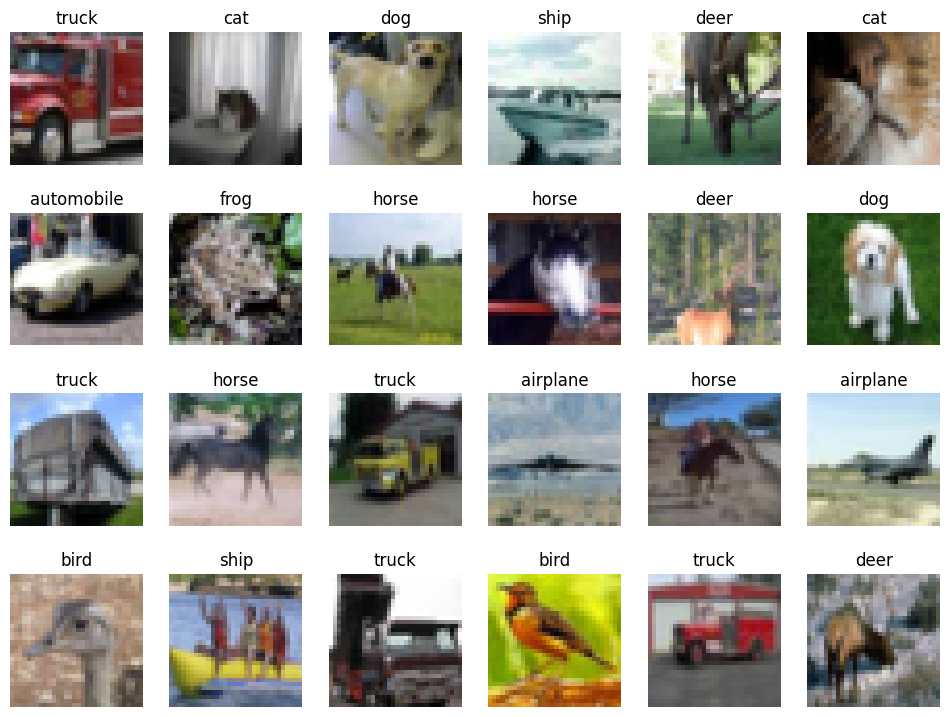

In [ ]:
cols = 6
rows = 4
fig, axs = plt.subplots(rows, cols, figsize=(12, 9))

for x in range(rows):
    for y in range(cols):
        rnd_idx = randrange(len(trainset.data))

        axs[x, y].set_title(IDX_TO_LABEL[trainset.targets[rnd_idx]])
        axs[x, y].imshow(trainset.data[rnd_idx])
        axs[x, y].set_axis_off()

plt.show()

---
Dataset distribution,<br>
The dataset distribution is a critical topic when it comes to machine learning. An imbalanced dataset (different number of examples for each class), may hamper our model from achieving good overall accuracy. Each class should contain the same number of examples for the dataset to be perfectly balanced.

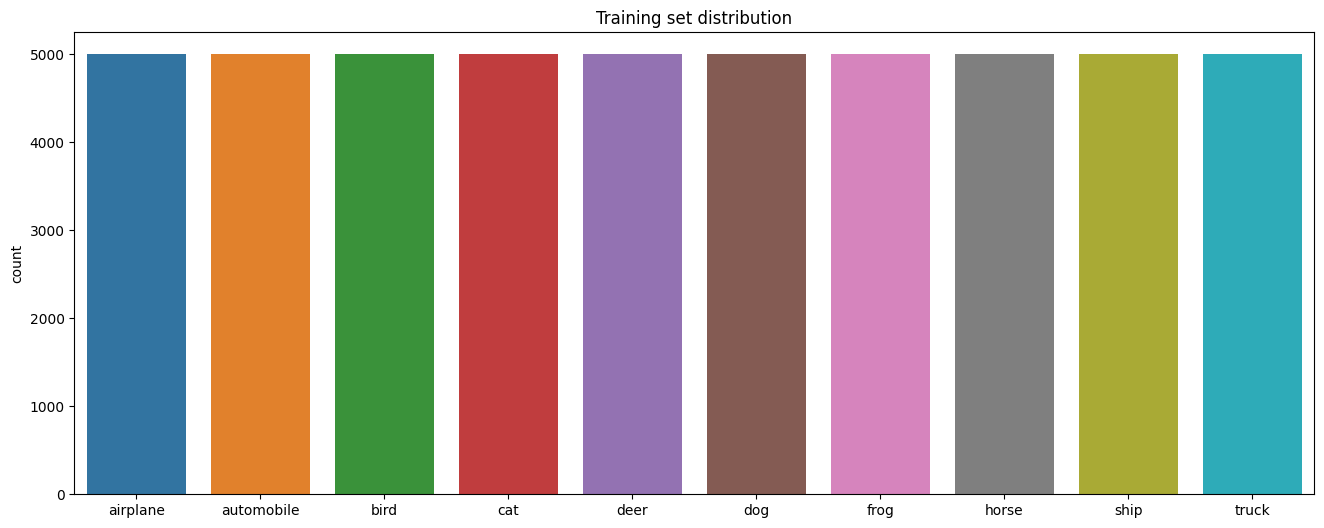

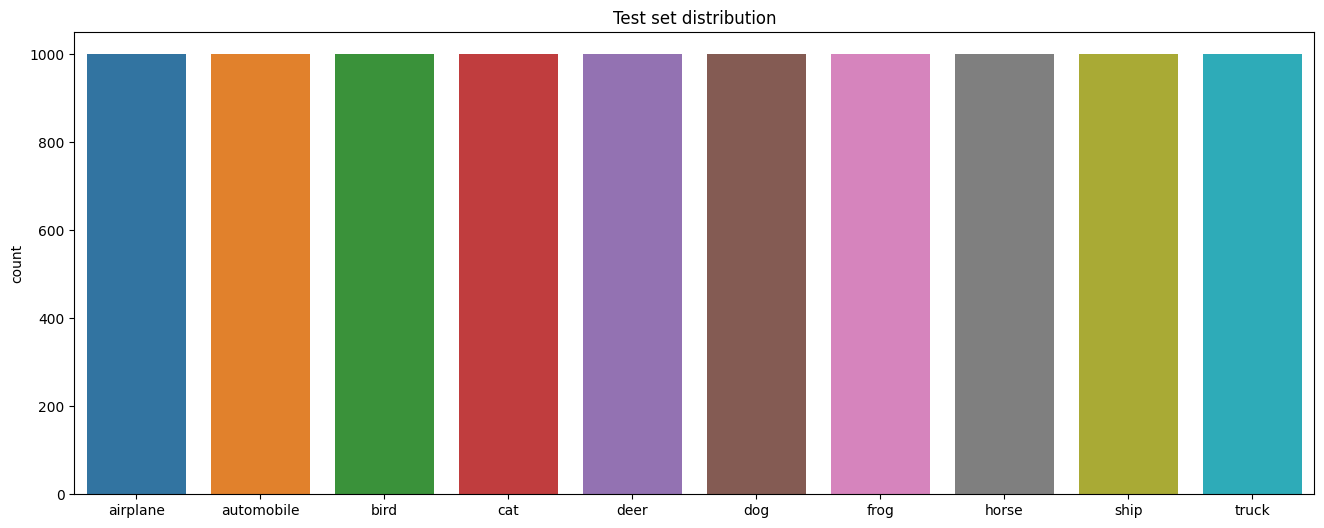

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.countplot(
    x=pd.Series(trainset.targets).map(IDX_TO_LABEL),
    order=IDX_TO_LABEL.values(),
).set_title('Training set distribution')

plt.show()

fig, ax = plt.subplots(figsize=(16, 6))

sns.countplot(
    x=pd.Series(testset.targets).map(IDX_TO_LABEL),
    order=IDX_TO_LABEL.values(),
).set_title('Test set distribution')

plt.show()

### 2- Define the Convolutional Neural Network (CNN)

In [ ]:
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.res1 = nn.Sequential(nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True)
        ), nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True))
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.res2 = nn.Sequential(nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True)
        ), nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True))
        )

        self.classifier = nn.Sequential(
            nn.MaxPool2d(4),
            nn.Flatten(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.res1(x) + x
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.res2(x) + x
        x = self.classifier(x)

        return x

Conv2d(convolutional operations):<br>
* arguments: in_channels, out_channels, kernel_size
 * in_channels = 3 because our image is RGB
 * out_channels = 6 (read this post for guidelines for choosing this number) means the output will have 6 feature maps.
 * kernel_size = 5 means the size of our square convolutional kernel is 5x5. Kernels are basically filters that act as feature detectors from the original input image. This filter moves around the image, detects the features, and produces the feature maps.
* Notice that our second convolution layer (Conv2) has in_channels that has to be the same as the out_channels of our first conv (Conv1). This is because input that goes into this network layer is successively, as the output from the first layer is the input for the second layer, and so on.

MaxPool2d(Max pooling operations):<br>
* when we are passing in (2,2) into MaxPool2d, this means we’re turning our image into 2x2 dimensions while retaining “important” features.

Linear(Fully connected layers):<br>
* We use the Linear transformation in the fc layers, which are the same mathematic operation that happens in Artificial Neural Network. The operation follows the form of g(Wx + b) where x is our input vectors, W is the weight matrix, b is the bias vector and g is an activation.
* A good way to think of fc layers is to use the concept of Principal Component Analysis PCA that selects the good features among the feature space created by the Conv and pool layers.

The flow of our forward algorithm:<br>
First our input (x) passes through the conv1 object, then it’s passed into a ReLU activation function and then to a max pooling function. Following this idea, we see that the flow is something like below.<br>
<br>
input ⟹ conv2d ⟹ relu ⟹ maxpool2d ⟹ conv2d ⟹ relu ⟹ maxpool2d ⟹ view ⟹ linear ⟹ relu ⟹ linear ⟹ relu ⟹ linear

For our forward function, we used the view function, so let’s break down what that does.<br>
x.view(-1, 16 * 5 * 5)

* View is used to reshape tensors. Let’s say we set a = torch.range(1, 16). a is now a tensor with 16 elements. To reshape it, we can use a.view(4,4) to turn it into a 4x4 tensor.
* With that, you might ask what -1 is for. When we don’t know how many rows or columns you want, PyTorch can automatically set a value for you when you pass in -1. In our case, we know our columns will be 16 * 5 * 6, but we don’t know how many rows we want.
* The reason we’re using view is that we need to flatten the output from our conv layer and give it to our fully connected layers. Another option is to use x.flatten(1), which can be easier to understand.

In [ ]:
net = ResNet()
# net = net.to(device)
# summary(net, (3, 32, 32), batch_size=32)

Dataloaders

The function data_loaders creates a DataLoader for the trainset, validationset, and testset. A DataLoader is simply an iterable that abstracts the concept of mini-batches, very useful while training a network.

It also applies the transform defined.

### 3- Define the loss function and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()

Classification Cross Entropy Loss
CrossEntropyLoss from PyTorch is used when training classification problems. What it does is combine log softmax and Negative Log-Likelihood.

Below, I’ll briefly explain the terminologies:

* softmax — scales numbers into probabilities for each outcome. These probabilities sum to 1.
* log softmax — A log version of softmax. It basically applies a log transformation to the probabilities from softmax, which handles numerical unstability. It also allows for improved numerical performance and gradient optimization
* Negative Log-Likelihood — Used in tandem with softmax, negative log-likelihood is a loss function that calculates the loss based on the range of its function. If it receives a small value from the softmax output, it can reach infinite loss which gives us a lower prediction confidence. But if it receives a high value from the softmax output, the loss is smaller, and the confidence is high. See an illustration of this below.<br>
<img src='https://drive.google.com/uc?id=156Sj1v98-lPOxt992Gy-nPz5h7HS7Z-g' width=700><br>


In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# optimizer = optim.Adam(
#         net.parameters(),
#         lr=config['lr'],
#         betas=(config['beta1'], config['beta2']),
#         amsgrad=config['amsgrad'],
#     )

**Optimizers**:<br>
PyTorch’s optim contains several optimization algorithms. Using it, we construct an optimizer object that holds the current state of the object, it then updates the parameters based on the computed gradients. This cycle happens until the training ends. It’s basically a fundamental tool for the network to “learn” and update its weights from backpropagation.<br>

A popular alternative for optimizers is Adam. But we’re using Stochastic Gradient Descent which is very common in implementing gradient descent.<br>

Constructing optimizers would first require an iterable containing the parameters to optimize, and then there are other options such as tuning the learning rate and momentum.<br>

What our code means:<br>

* optim.SGD → Implements stochastic gradient descent
* net.parameters() → gets the learnable parameters of the CNN
* lr → learning rate of the gradient descent (how big of a step you take)
* momentum → momentum helps accelerate gradient vectors in the right directions, which leads to faster converging.

### 4- Train the model on the train data

In [ ]:
# To time our network training, we can use torch.cuda.Event if we are using a GPU powered training since cuda operations are asynchronous.
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0): #loop to enumerate over the batches from trainloader
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data #Split data into inputs and labels objects

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #Pass the inputs into our neural network
        loss = criterion(outputs, labels) #our CrossEntropyLoss function
        # outputs -> the predicted class.
        # labels -> the correct class.
        loss.backward() #PyTorch’s way to perform backpropagation by computing the gradient based on the loss.
        optimizer.step() #After computing gradient using backward(), this iterates over all the parameters and update their values.

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0 #Set running loss as zero again for the next iteration


# whatever you are timing goes here
end.record()

# Waits for everything to finish running
torch.cuda.synchronize()

print('Finished Training')
print(start.elapsed_time(end))  # milliseconds

[1,  2000] loss: 3.066
[1,  4000] loss: 2.214
[1,  6000] loss: 2.003
[1,  8000] loss: 1.830
[1, 10000] loss: 1.674
[1, 12000] loss: 1.548
[2,  2000] loss: 1.390
[2,  4000] loss: 1.291
[2,  6000] loss: 1.238
[2,  8000] loss: 1.161
[2, 10000] loss: 1.109
[2, 12000] loss: 1.046
Finished Training
4903511.0



* An epoch is one pass over the entire train set
* This code sets the epoch as 2, which means we loop over the entire train set 2 times
* The number of epochs you choose depends on how long you want to train your network, the right amount depends on the optimizer you use and the network you’re training. We’re going for 2 so it saves time on training.
* Note that too many epochs could lead to overfitting, because the network has been learning from the training data for too long.

optimizer.zero_grad()

* Zero the parameter gradients
* It’s a crucial step to zero out the gradients or else all the gradients from multiple passes will be accumulated.[Link](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)

### 5- Test the network on test data

let’s now test it on a single batch by calling the iter function on our testloader and get our images and labels using the next function.

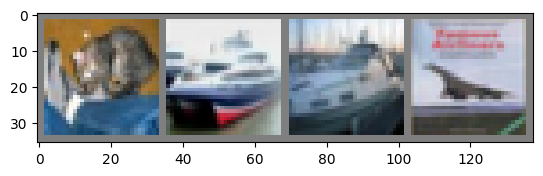

GroundTruth:  cat ship ship plane


In [ ]:

dataiter = iter(testloader)
images, labels = next(dataiter)


def imshow(img):
  ''' function to show image '''
  img = img / 2 + 0.5 # unnormalize
  npimg = img.numpy() # convert to numpy objects
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()


# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  cat car car plane


We can use our trained network by calling net() on our images.

_, predicted = torch.max(outputs, 1)

* What torch.max does is it returns the maximum values of all the elements in the output tensor. The argument dim which we set to 1 stands for which axis we want to find the max value. The output of this command gives us the index and the actual elements in the tensor.
* We set dim = 1 because our predictions are in rows of the tensor, and we want the max for each rows. We don’t need the actual values of the output, only the index, so we can use _ in Python to set it as an unnecessary variable. Taking the index our maximum, we can take it and find the label of the class based on the class set we defined previously.

---
Testing on 10,000 images

In [ ]:

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 70 %


torch.no_grad()

* torch.no_grad is used when we don’t require PyTorch to run its autograd engine, in other words, calculate the gradients of our input. Since we’re only calculating the accuracy of our network. This will help reduce memory usage and speed up computation.<br>

(predicted == labels).sum().item()

* this is a boolean expression. We can sum the amount of times we get the right prediction, and then grab the numeric value using item()